<a href="https://colab.research.google.com/github/aniket15031998/Twitter-Sentiment-Analysis-Problem-/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** : Twitter Sentiment Analysis

# **Project Summary** :    

The primary objective of this project is to gain practical experience in addressing sentiment analysis challenges. By actively engaging in this project, participants will acquire valuable skills and techniques essential for solving text classification and sentiment analysis problems. This hands-on experience aims to provide a comprehensive learning opportunity and enhance proficiency in the field of sentiment analysis and text classification.

# **Problem Statement** :    

The goal of this project is to develop a system for detecting hate speech in tweets. For simplicity, we define a tweet as containing hate speech if it exhibits a racist or sexist sentiment. The objective is to classify tweets into those containing racist or sexist language and those that do not. The project will follow a systematic process to achieve this classification task, aiming to enhance understanding and proficiency in identifying and addressing hate speech within the context of social media.

# **Loading Libraries and Data** :

## Imorting libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import seaborn as sns
import nltk         #for text manipulation
nltk.download('wordnet') #for lemmitization
import re           #for regular expression
import string       #for string operations

pd.set_option('display.max_colwidth',200)       #specifies that any column will display maximum 200 charachters

#%matplotlib this code specifically helps to display plotted graph immediately below the code

[nltk_data] Downloading package wordnet to /root/nltk_data...


## Dataset Loading

In [5]:
train=pd.read_csv('/content/drive/MyDrive/data /Twitter Sentiment Analysis/train_E6oV3lV.csv')
test=pd.read_csv('/content/drive/MyDrive/data /Twitter Sentiment Analysis/test_tweets_anuFYb8.csv')

## We will make copy of this dataset so if we make changes to these dataset we will have original dataset

In [6]:
train_copy=train.copy()
test_copy=test.copy()

# **Data Inspection** :

### Dataset First View




In [7]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [8]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [9]:
train_columns=train.columns
test_columns=test.columns

In [10]:
train_columns

Index(['id', 'label', 'tweet'], dtype='object')

In [11]:
test_columns

Index(['id', 'tweet'], dtype='object')

### Dataset Shape

In [12]:
train.shape, test.shape

((31962, 3), (17197, 2))

### Dataset Information

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


### Missing values

In [15]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [16]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

### Duplicated values

In [17]:
train.duplicated().sum()

0

In [18]:
test.duplicated().sum()

0

### Dataset value counts

In [19]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

### We will check what kind of words are involved in each label

In [20]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [21]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


### length of tweets

In [22]:
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()

In [23]:
train_length.describe()

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: tweet, dtype: float64

In [24]:
test_length.describe()

count    17197.000000
mean        84.546374
std         29.606621
min         11.000000
25%         62.000000
50%         88.000000
75%        108.000000
max        292.000000
Name: tweet, dtype: float64

In [25]:
train_length.shape,test_length.shape

((31962,), (17197,))

Text(0, 0.5, 'test_Tweets')

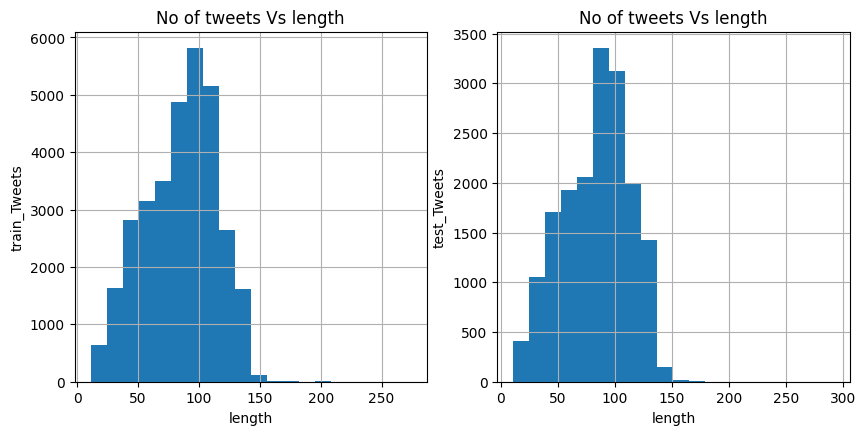

In [26]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
train_length.hist(bins=20)
plt.title('No of tweets Vs length')
plt.xlabel('length')
plt.ylabel('train_Tweets')


plt.subplot(2,2,2)
test_length.hist(bins=20)
plt.title('No of tweets Vs length')
plt.xlabel('length')
plt.ylabel('test_Tweets')


### Data Inspection Insights



1.   We have tow dataset train and test. Train has three columns and test has two columns.
2.   train_columns = ['id', 'label', 'tweet'] , test_columsn = ['id', 'label', 'tweet'].
3.   id - tweet_id in dataset , label - sentiment label (1-negative sentiment i.e labeled as racist or sexits 0-positive sentiment i.e labeled as non racist or sexist.
4.  train dataset has total 31962 entries and 3 columns while test dataset has 17198 entries and 2 columns
5.  Both the datasets has no missing or duplicated values.
6.  Outoff total 31962 entries in train dataset 0 labeled dataset are 29720 and 1 labeled dataset are 2242.
7. Consedring length of tweets in both train and test dataset maximum length of tweets is less than 300 and most common length is around approx 90
8.  Their and different kind of words included in tweets with characters and numbers also



# **Data Cleaning** :

The main objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation,special charachters,numbers, and terms which do not carry much weightage in context to the text.

Before begin cleaning let's combine the train and test dataset to clean it together and later we will split it.

In [27]:
#combining both test and train dataset for cleaning process
combine = train.append(test,ignore_index=True)
combine.shape

<ipython-input-27-6e1baf800155>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test,ignore_index=True)


(49159, 3)

In [28]:
combine

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [29]:
#function to find the pattern in tweet and then replace it with '' blank space and form new tweet

def remove_pattern(pattern,input_txt):
  r = re.findall(pattern,input_txt)
  for i in r:
    input_txt = re.sub(i,'',input_txt)
  return input_txt

We will execute the following cleaning process:



1.   Removing the userid which is hided and mentioned as @user which is of no use.
2.   Removing unwanted charachter,punctuation marks,numbers which have no use in sentiment analysis except #followed words because it shows sentiment
3.   Removing small words like 'pdx','all','his' as it is of no use.
4.   Finally we will normalize data.Like we will keep the shortest form of any word which means same sentiment like 'loving','loves','loveable' these will be converted to 'love' which means same sentiment also avoiding information loss and maintaining optimal amount of unique words.



## Remove twitter handles(@user):



In [30]:
pattern = '@[\w]*' #this matches any word starting with @ and followed by any one or more charachters in the box

#np.vectorize makes sure the function is applied to each row
combine['tidy_tweet'] = np.vectorize(remove_pattern)("@[\w]*",combine['tweet'])

In [31]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Remove punctuations,numbers and special characters except # :

Here we will not use the remove_pattern function as it is used to remove the match and do not replace it with anything here we will replace the matches with " ". Hence we will use str and replace function and will replace punctuations,numbers and special characters with blank space

**Regular expression** for the same is

**'[^a-zA-Z#]'** here **'^'**  this sign makes sure anything mentioned after this is kept unchnaged and remnaining is replaced.

In [32]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

<ipython-input-32-b489befff085>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


In [33]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## Removing short words :    

Here we have to be carefull to decide which word is short and should be removed. So we will decide criteria to eliminate them which will be word length. Words having length less than 3 will be removed from the string.

For example words like 'hmm','ohh' are of no use

We will use lambda function here

We will first split the string into list of words and then will join this list again in a string with only those words whose length is greater than 3



In [34]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda t: ' '.join([w for w in t.split() if len(w)>3]))

In [35]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Making copy of this data before normalizing data to use for two different methods

In [36]:
combine_copy = combine.copy() #will be used for lemmatizaion

## Text Normalization :    


Text normalization is process in which the text data is converted into its smallest unit. for eg corpus - document - paragraph - sentence - words and further even words to charachters if required.

It has two techniques stemming and lemmitazation

We will use here Porterstemmer ftom nltk.stem.porter

First we will tokenize the tidy tweet

### Tokenization

In [37]:
#tokenizing - spliting each row tweet text
tokenized_tweet = combine['tidy_tweet'].apply(lambda t: t.split())

In [38]:
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized_tweet dataset

### Stemming

In [39]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

stem_tokenized_tweet = tokenized_tweet.apply(lambda t: [stemmer.stem(i) for i in t])

In [40]:
stem_tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [41]:
stem_tokenized_tweet = stem_tokenized_tweet.apply(lambda t: ' '.join(t)) #stiching each stem_tokenized tweet

In [42]:
stem_tokenized_tweet.head()

0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: tidy_tweet, dtype: object

In [43]:
#replacing tidy_tweet column data with tokenized data
combine['tidy_tweet'] = stem_tokenized_tweet

In [44]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


### Lemmatization :

Here we will add the lemmatized tidy tweet version to combine copy to make two different dataset to check the effect of stemming and lemmatization as stemming results in formation of more meaning less words which is its disadvantage of

In [45]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

lemma_tokenized_tweet = tokenized_tweet.apply(lambda t: [wordnet_lemmatizer.lemmatize(i) for i in t])

In [46]:
lemma_tokenized_tweet = lemma_tokenized_tweet.apply(lambda t: " ".join(t))

In [47]:
lemma_tokenized_tweet.head()

0                when father dysfunctional selfish drag kid into dysfunction #run
1    thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked
2                                                             bihday your majesty
3                                                      #model love take with time
4                                                  factsguide society #motivation
Name: tidy_tweet, dtype: object

In [48]:
combine_copy['tidy_tweet'] = lemma_tokenized_tweet

In [49]:
combine_copy.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drag kid into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair van #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


# **Story Generation and Visualization from Tweets**


Prior to delving into the dataset exploration, it is crucial to formulate thoughtful inquiries pertaining to the available data. Some potential questions include:

1.  What words appear most frequently throughout the entire dataset?

2.  In the dataset, what are the most prevalent words associated with negative and positive tweets separately?

3.  What is the total count of hashtags in a tweet?

4.  Are there noticeable patterns in the dataset?

5.  Do particular trends align with either positive or negative sentiments, and are these trends congruent with the expressed sentiments?

## Understanding most common words in the tweets

This can be done by WordCloud

This helps to plot an image with most common words in large size and vice-versa

In [ ]:
 #combining all the tweets in dataset by first forming a big list of all the tweets and then joining it

 all_words = " ".join([text for text in combine['tidy_tweet']])

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=500,random_state=1,max_font_size=100).generate(all_words)

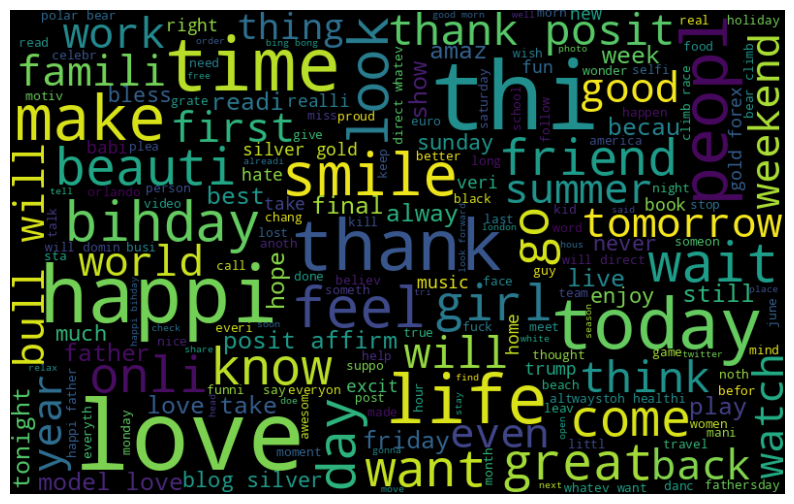

In [ ]:
#plotting image form the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Understanding words in non racist/sexist tweets

In [ ]:
#preparing positive tweet dataset
positive_tweets = combine[combine['label']==0]

In [ ]:
positive_tweets.shape

(29720, 4)

In [ ]:
positive_tweets.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [ ]:
#combining normal words together from positive tweet dataset
normal_words = " ".join([text for text in positive_tweets['tidy_tweet']])

print(len(normal_words))
print('\n')

1545956




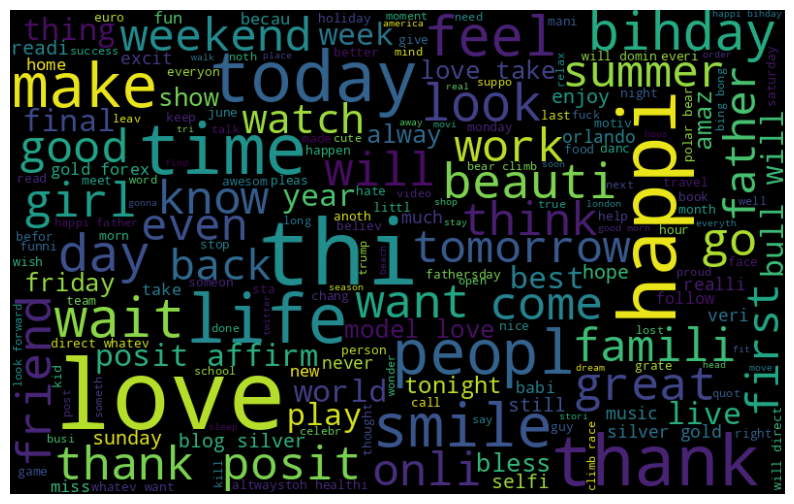

In [ ]:
#plotting normal words worlcloud
normal_wordcloud = WordCloud(width=800,height=500,random_state=0,max_font_size=100).generate(normal_words)

plt.figure(figsize=(10,8))
plt.imshow(normal_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Understanding words in  racist/sexist tweets

In [ ]:
#preparing negative tweets dataset
negative_tweets = combine[combine['label']==1]

In [ ]:
negative_tweets.shape

(2242, 4)

In [ ]:
negative_tweets.head()

,id,label,tweet,tidy_tweet
13,14,1.0,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot,#cnn call #michigan middl school build wall chant #tcot
14,15,1.0,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins,comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin
17,18,1.0,retweet if you agree!,retweet agre
23,24,1.0,@user @user lumpy says i am a . prove it lumpy.,lumpi say prove lumpi
34,35,1.0,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia,unbeliev that centuri need someth like thi again #neverump #xenophobia


In [ ]:
#combining negative words from negative tweet dataset
negative_words = " ".join([text for text in negative_tweets['tidy_tweet']])

print(len(negative_words))
print('\n')

126864




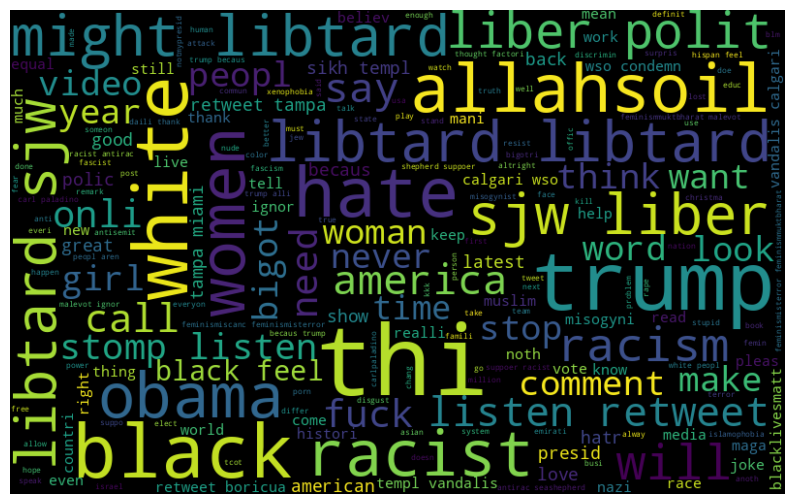

In [ ]:
#plotting negative word wordcloud
negative_wordcloud = WordCloud(width=800,height=500,random_state=0,max_font_size=100).generate(negative_words)

plt.figure(figsize=(10,8))
plt.imshow(negative_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Understanding the impact of hastags on the tweet sentiments

In [ ]:
negative_tweets.head()

,id,label,tweet,tidy_tweet
13,14,1.0,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot,#cnn call #michigan middl school build wall chant #tcot
14,15,1.0,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins,comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin
17,18,1.0,retweet if you agree!,retweet agre
23,24,1.0,@user @user lumpy says i am a . prove it lumpy.,lumpi say prove lumpi
34,35,1.0,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia,unbeliev that centuri need someth like thi again #neverump #xenophobia


In [ ]:
#function to extract hastags from each tweet

def hastag_extract(input_data):
  hastags=[]
  for i in input_data:
    ht = re.findall(r'#(\w+)',i)
    hastags.extend(ht)
  return hastags

In [ ]:
HT_regular = hastag_extract(positive_tweets['tidy_tweet']) # list of regular hastags words

In [ ]:
HT_negative = hastag_extract(negative_tweets['tidy_tweet']) # list of negative hastag words

In [ ]:
#preparing dict of regular words with its occurence counts
reg_word_freq_dist = nltk.FreqDist(HT_regular)

In [ ]:
reg_word_freq_dist

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [ ]:
#preparing dataframe with columns Hastags and its counts
reg_word_freq_dist_df = pd.DataFrame({'Hastags': list(reg_word_freq_dist.keys()),'Counts': list(reg_word_freq_dist.values())})

In [ ]:
reg_word_freq_dist_df

,Hastags,Counts
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19490,kamp,1
19491,ucsd,1
19492,berlincitygirl,1
19493,genf,1


<ipython-input-303-77808dad40e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20,x='Hastags',y='Counts',palette='rainbow')


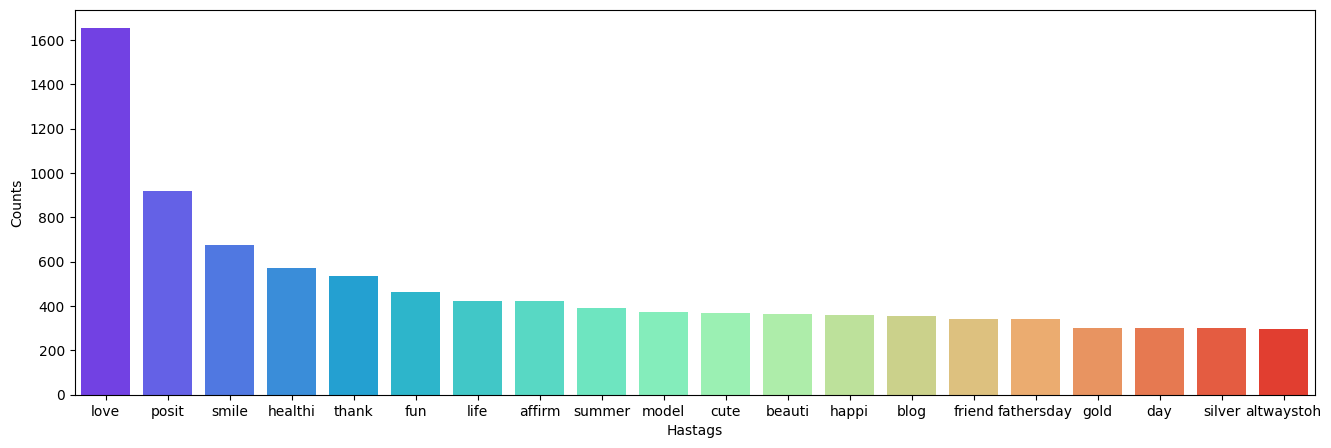

In [ ]:
#getting top 20 most occurred words
top_20=reg_word_freq_dist_df.nlargest(columns='Counts',n=20)

#plotting graph for above data
plt.figure(figsize=(16,5))
sns.barplot(data=top_20,x='Hastags',y='Counts',palette='rainbow')
plt.show()

**Insights** All these hastags are positive and some are neutral and it makes sense their tweets are classified as posistive tweets

In [ ]:
#preparing dict of neg words with its occurence counts
neg_word_freq_dist = nltk.FreqDist(HT_negative)

In [ ]:
neg_word_freq_dist

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [ ]:
#preparing dataframe with columns Hastags and its counts
neg_word_freq_dist_df = pd.DataFrame({'Hastags':list(neg_word_freq_dist.keys()),'Counts':list(neg_word_freq_dist.values())})

In [ ]:
neg_word_freq_dist_df

,Hastags,Counts
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1


<ipython-input-296-2076b65bf5e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20,x='Hastags',y='Counts',palette='rainbow')


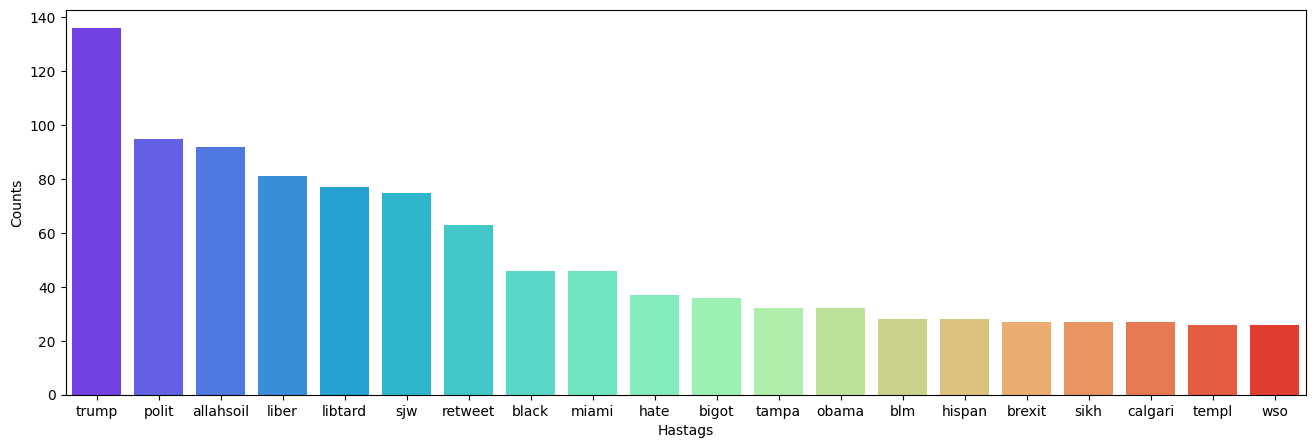

In [ ]:
#getting top 20 most occurred words
top_20 = neg_word_freq_dist_df.nlargest(columns='Counts',n=20)

#plotting graph for above data
plt.figure(figsize=(16,5))
sns.barplot(data=top_20,x='Hastags',y='Counts',palette='rainbow')
plt.show()

**Insights** All these hastags are negative and some are neutral and it makes sense their tweets are classified as posistive tweets.

From both the tweet dataset we can conclude that these hastags make sense and we should keep them in our dataset.

# **Feature Extraction**

 To analyze and built model on preprocessed data it very important to have features so will convert it into features. Depending upon usage text feautres can be constructed using below techniques



*   Bag-of-words features
*   TF-IDF features
*   Word2Vec features



In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #for bag-of-words features amd tfidf feature extraction
import gensim #for semantic analysis of corpus

## Bag-of-words

This technique helps to make feature of unique-most relevant words from given data. Here D is considered as number of documents from data and N is considered as unique-token extracted from data which you can define the number and it generates data matrix with shape D*N

In [65]:
# countvectorizer is used to create bog-of-words matrix data here
# max_df - When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold

# min_df this defines if any words frequency in document is less than this then our vocabulary can ignore this term as irrelevant
# max_features defines maximum words to be  considered as features
# stop_word is to define stop_words from data to ignore them
# here tweets are considered as documents

bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet'])
bow.shape

(49159, 1000)

In [72]:
bow_df = pd.DataFrame(bow.toarray(),columns=bow_vectorizer.get_feature_names_out())

In [75]:
bow_df.shape

(49159, 1000)

In [80]:
bow_df.head()

,abl,absolut,accept,account,act,action,activ,actor,actual,adapt,...,yay,yeah,year,yesterday,yoga,york,young,youth,youtub,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
